Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy on test set: 0.84
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       200
           1       0.80      0.78      0.79       125

    accuracy                           0.84       325
   macro avg       0.83      0.83      0.83       325
weighted avg       0.84      0.84      0.84       325

ROC AUC score: 0.8935
     Survived  Predicted_Survival
0           0                   0
1           0                   0
2           0                   0
3           0                   0
4           0                   0
..        ...                 ...
223         0                   0
224         1                   1
225         0                   0
226         0                   0
227         0                   0

[228 rows x 2 columns]


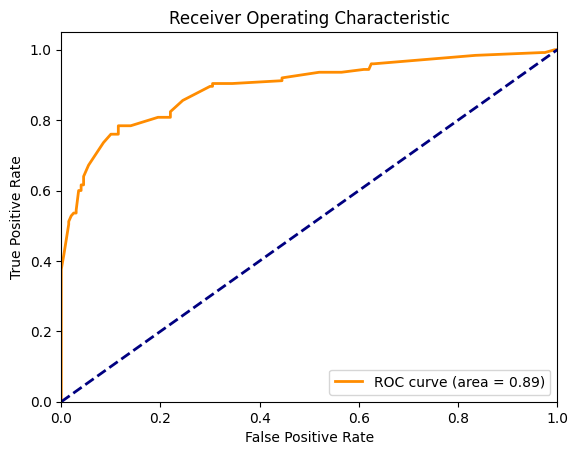

In [5]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Mount Google Drive
drive.mount('/content/drive')

# Read the Excel file into DataFrames
archivo_drive = '/content/drive/MyDrive/Colab Notebooks/anilitica1/titanicdf-naive.xlsx'
df_titanic = pd.read_excel(archivo_drive, sheet_name='titanicdf')
df_new_passengers = pd.read_excel(archivo_drive, sheet_name='Pasajeros nuevos ')

# Data Preprocessing: Encode categorical variables
encoders = {col: LabelEncoder().fit(df_titanic[col]) for col in ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']}
for col, encoder in encoders.items():
    df_titanic[col] = encoder.transform(df_titanic[col])
    df_new_passengers[col] = encoder.transform(df_new_passengers[col])

# Separate the features and the target variable
X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
model = CategoricalNB()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Output the evaluation metrics
print(f'Accuracy on test set: {accuracy}')
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc}')

# Predictions for new passengers
new_passengers_features = df_new_passengers.drop('Survived', axis=1)
new_passengers_predictions = model.predict(new_passengers_features)

# Add predictions back to the DataFrame for comparison
df_new_passengers['Predicted_Survival'] = new_passengers_predictions
print(df_new_passengers[['Survived', 'Predicted_Survival']])

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
